In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from defects import *
import sys
import os


sys.path.insert(1, os.path.dirname(os.getcwd()))

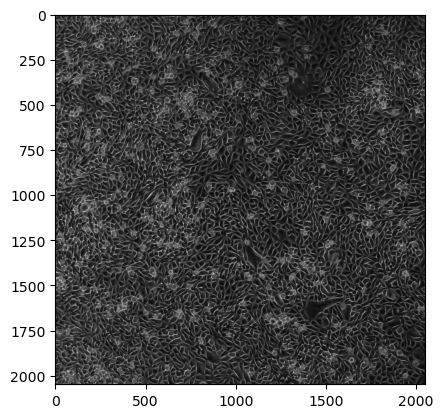

In [24]:
file = r"..\_bacteria\hbec_images\raw\Trans__281.tif" ##changed for trial session

# TODO works only for reqtangular images.  do we want to do somthing about it ?
img = plt.imread(file)#[:,:900]
img = img[-np.min(img.shape):,-np.min(img.shape):]
plt.imshow(img, cmap="gray")

In [25]:
# Due to the choice of the 2x2 grid (neigbors in the northeastern corner), 
# we move the detected defect to the middle of the cell
shift = 1/2 
# you should resize the image to fasten the running time 
# img = cv2.resize(img, dsize = (800,800))
pix_x = img.shape[1]
pix_y = img.shape[0]

x = np.arange(0,pix_x)
y = np.arange(0,pix_y)

xx, yy = np.meshgrid(x, y)

ori, coh, E = orientation_analysis(img, 35)
k = compute_topological_charges(ori, int_area='cell', origin='upper')
defects = localize_defects(k, x_grid=xx, y_grid=yy)
compute_defect_orientations(ori, defects)
plushalf = defects[defects['charge']==.5]
minushalf = defects[defects['charge']==-.5]

Text(0, 0.5, 'y (in pixels)')

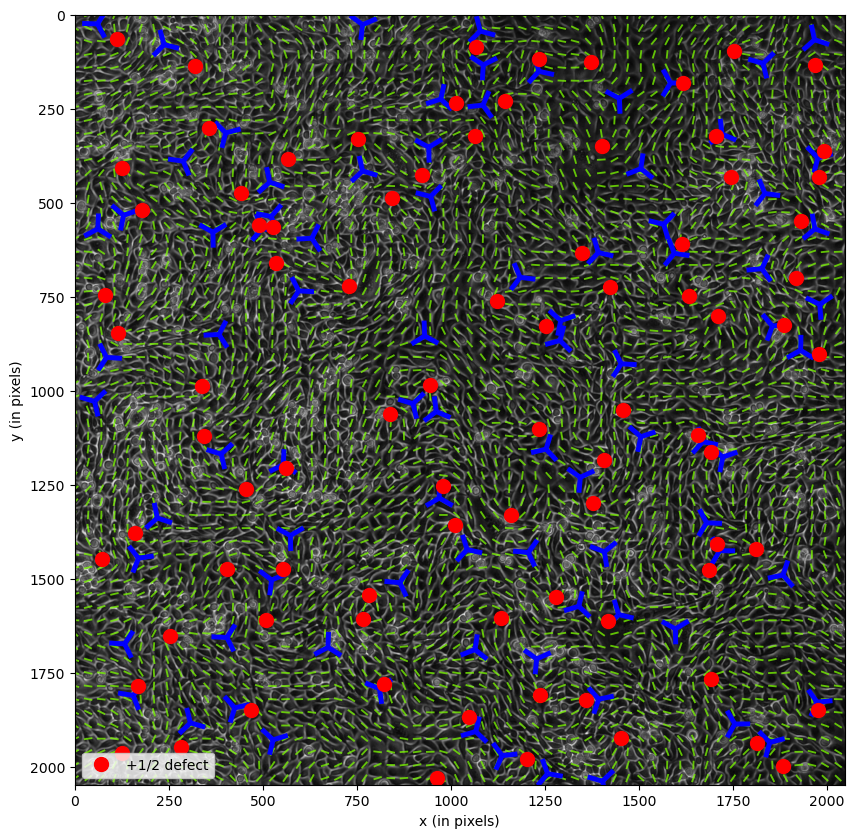

In [26]:

fig, ax  = plt.subplots(figsize=(10,10))
s = 35
## 
ax.imshow(img, cmap='gray')
ax.quiver(xx[::s,::s], yy[::s,::s], 
    np.cos(ori)[::s,::s], np.sin(ori)[::s,::s], 
    headaxislength=0, headwidth=0, headlength=0, 
    color='lawngreen', scale=90, pivot='mid', alpha=.75)

ax.plot(plushalf['x'], plushalf['y'],'ro',markersize=10,label=r'+1/2 defect')
# ax.quiver(plushalf['x'], plushalf['y'], 
#     np.cos(plushalf['ang1']), np.sin(plushalf['ang1']), 
#     headaxislength=0, headwidth=0, headlength=0, color='r', scale=50)

for i in range(3):
    ax.quiver(minushalf['x'], minushalf['y'], 
        np.cos(minushalf['ang'+str(i+1)]), np.sin(minushalf['ang'+str(i+1)]), 
        headaxislength=0, headwidth=0, headlength=0, color='b', scale=50)

ax.legend()
ax.set_xlabel('x (in pixels)')
ax.set_ylabel('y (in pixels)')